In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Introduction

First we'll load some dependencies into our Jupyter lab instance and print out the last date this notebook was run.

In [2]:
import datetime
import rdflib
start = datetime.datetime.utcnow()
print(f"Started at {start}")
from fastai.tabular import *
import sys
sys.path.append("../src")
import data_loader
import data_block

Started at 2020-06-26 17:13:57.781004


## Load RDF from Sinopia 
Download the zip exports from Sinopia's [Production](https://sinopia.io/exports), [Stage](https://stage.sinopia.io/exports), and [Development](https://development.sinopia.io/exports) environments.

We then call `data_loader.from_zipfile` function that returns a list of RDF graphs, one for each resource. For non-RDF fields, an error message is generated. 

In [3]:
help(data_loader.from_zipfile)

Help on function from_zipfile in module data_loader:

from_zipfile(zip_filepath: str) -> List
    Takes a zip filepath, extracts Sinopia RDF files, loading each JSON-LD
    into a rdflib.ConjunctionGraph, returns a list of these graphs.
    
    @param zip_filepath -- Path to zip files



In [26]:
production = data_loader.from_zipfile("../../sinopia_export_all_2020-06-25T22:18:25.079Z.zip")
stage = data_loader.from_zipfile("../../sinopia_export_all_2020-06-21T00:02:01.995Z.zip")
development = data_loader.from_zipfile("../../sinopia_export_dev-2020-06-21.zip")

Failed to parse sinopia_export_all_2020-06-25T22:18:25.079Z/ucdavis_2020-06-25T22:18:26.807Z/complete.log
Failed to parse sinopia_export_all_2020-06-25T22:18:25.079Z/yale_2020-06-25T22:18:51.203Z/complete.log
Failed to parse sinopia_export_all_2020-06-25T22:18:25.079Z/cornell_2020-06-25T22:18:25.124Z/complete.log
Failed to parse sinopia_export_all_2020-06-25T22:18:25.079Z/minnesota_2020-06-25T22:18:50.084Z/complete.log
Failed to parse sinopia_export_all_2020-06-25T22:18:25.079Z/harvard_2020-06-25T22:18:49.169Z/complete.log
Failed to parse sinopia_export_all_2020-06-25T22:18:25.079Z/stanford_2020-06-25T22:18:28.115Z/complete.log
Failed to parse sinopia_export_all_2020-06-25T22:18:25.079Z/princeton_2020-06-25T22:18:26.008Z/complete.log
Failed to parse sinopia_export_all_2020-06-25T22:18:25.079Z/boulder_2020-06-25T22:18:50.637Z/complete.log
Failed to parse sinopia_export_all_2020-06-25T22:18:25.079Z/pcc_2020-06-25T22:18:50.872Z/complete.log
Failed to parse sinopia_export_all_2020-06-25T22

In [5]:
print(f"Length of production: {len(production)}, stage: {len(stage)}, and development {len(development)}")

Length of production: 2725, stage: 4067, and development 192


## First Strategy Potential RDF Predicates as Data Frame Columns
The first strategy for creating a [Pandas Data Frame]() is defined in the `data_loader.to_dataframe` function that takes a list of RDF graphs and a Trellis URL of the environment's resource templates and returns a data frame.

In [12]:
help(data_loader.to_dataframe)

Help on function to_dataframe in module data_loader:

to_dataframe(graphs: List[rdflib.graph.Graph], rt_url: str) -> pandas.core.frame.DataFrame



How we create a data frame has siginificant implications for any machine learning classification tasks. Initially we will create three seperate data frames, one for each environment, starting with production.

In [70]:
prod_df = data_loader.to_dataframe(production, 'https://trellis.sinopia.io/repository/ld4p')

Starting convert 2725 to dataframe at 2020-06-26 20:08:05.313616
.0..........100..........200..........300..........400..........500..........600..........700..........800..........900..........1000..........1100..........1200..........1300..........1400..........1500..........1600..........1700..........1800..........1900..........2000..........2100..........2200..........2300..........2400..........2500..........2600..........2700..Finished at 2020-06-26 20:10:28.711330 total time 2.3833333333333333 minutes for dataframe, size 2727


In [71]:
prod_df.head()

,subject,resource_template,group,http://id.loc.gov/ontologies/bibframe/adminMetadata,http://rdaregistry.info/Elements/e/P20231,http://rdaregistry.info/Elements/e/P20313,http://rdaregistry.info/Elements/e/P20224,http://rdaregistry.info/Elements/e/P20006,http://rdaregistry.info/Elements/e/P20065,http://rdaregistry.info/Elements/e/P20207,...,https://library.yale.edu/ld4p/terms/distributionDateLabel,http://vivoweb.org/ontology/core#rank,https://library.yale.edu/ld4p/terms/localGenreForm,http://www.loc.gov/mads/rdf/v1#deathPlace,https://library.yale.edu/ld4p/terms/productionDateLabel,http://www.loc.gov/mads/rdf/v1#terminateDate,http://www.loc.gov/mads/rdf/v1#Affiliation,http://www.loc.gov/mads/rdf/v1#affiliationStart,http://www.loc.gov/mads/rdf/v1#affiliationEnd,http://www.loc.gov/mads/rdf/v1#Topic
0,https://trellis.sinopia.io/repository/stanford...,ld4p:RT:bf2:Monograph:Instance:Un-nested,stanford,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,https://trellis.sinopia.io/repository/yale/5fd...,Yale:RT:BF2:Monograph:Instance:CtY-BR,yale,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,https://trellis.sinopia.io/repository/yale/fe0...,Yale:RT:BF2:Monograph:Instance:CtY-BR,yale,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,https://trellis.sinopia.io/repository/washingt...,WAU:RT:RDA:Item:monograph,washington,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,https://trellis.sinopia.io/repository/washingt...,WAU:RT:RDA:Work:monograph,washington,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
prod_df.tail()

,subject,resource_template,group,http://id.loc.gov/ontologies/bibframe/adminMetadata,http://rdaregistry.info/Elements/e/P20231,http://rdaregistry.info/Elements/e/P20313,http://rdaregistry.info/Elements/e/P20224,http://rdaregistry.info/Elements/e/P20006,http://rdaregistry.info/Elements/e/P20065,http://rdaregistry.info/Elements/e/P20207,...,https://library.yale.edu/ld4p/terms/distributionDateLabel,http://vivoweb.org/ontology/core#rank,https://library.yale.edu/ld4p/terms/localGenreForm,http://www.loc.gov/mads/rdf/v1#deathPlace,https://library.yale.edu/ld4p/terms/productionDateLabel,http://www.loc.gov/mads/rdf/v1#terminateDate,http://www.loc.gov/mads/rdf/v1#Affiliation,http://www.loc.gov/mads/rdf/v1#affiliationStart,http://www.loc.gov/mads/rdf/v1#affiliationEnd,http://www.loc.gov/mads/rdf/v1#Topic
2722,https://trellis.sinopia.io/repository/washingt...,WAU:RT:RDA:Work:monograph,washington,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2723,https://trellis.sinopia.io/repository/nlm/1b7c...,ld4p:RT:bf2:Monograph:Work:Un-nested,nlm,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2724,https://trellis.sinopia.io/repository/yale/17f...,Yale:RT:BF2:Monograph:Instance:CtY,yale,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2725,https://trellis.sinopia.io/repository/yale/e80...,Yale:RT:BF2:Monograph:SuperWork:CtY,yale,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2726,https://trellis.sinopia.io/repository/yale/2f8...,Yale:RT:BF2:Monograph:SuperWork:CtY-BR,yale,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
stage_df = data_loader.to_dataframe(stage, 'https://trellis.stage.sinopia.io/repository/ld4p')

Starting convert 4067 to dataframe at 2020-06-26 20:11:17.453837
Failed https://trellis.stage.sinopia.io/repository/ld4p/UNAM:RT:BF2:RetenciÃ³n status 404
.0..........100..........200..........300..........400..........500..........600..........700..........800..........900..........1000..........1100..........1200..........1300..........1400..........1500..........1600..........1700..........1800..........1900..........2000..........2100..........2200..........2300..........2400..........2500..........2600..........2700..........2800..........2900..........3000..........3100..........3200..........3300..........3400..........3500..........3600..........3700..........3800..........3900..........4000......Finished at 2020-06-26 20:15:14.358796 total time 3.933333333333333 minutes for dataframe, size 5497


In [74]:
stage_df.head()

,subject,resource_template,group,http://id.loc.gov/ontologies/bibframe/ProductionMethod,http://www.w3.org/2000/01/rdf-schema#label,http://id.loc.gov/ontologies/bflc/catalogerId,http://id.loc.gov/ontologies/bibframe/identifiedBy,http://id.loc.gov/ontologies/bibframe/source,http://id.loc.gov/ontologies/bibframe/descriptionConventions,http://id.loc.gov/ontologies/bibframe/descriptionLanguage,...,http://id.loc.gov/ontologies/bflc/otherPhysicalDetails,https://library.yale.edu/ld4p/terms/earliestDate,https://library.yale.edu/ld4p/terms/latestDate,http://id.loc.gov/ontologies/bibframe/genreForm3,http://schema.org/isbn,http://www.loc.gov/mads/rdf/v1#ConferenceName,http://id.loc.gov/ontologies/bibframe/CollectiveTitle,http://id.loc.gov/ontologies/bibframe/IntendedAudience,http://id.loc.gov/ontologies/bibframe/reproductionOf,http://id.loc.gov/ontologies/bibframe/MusicEnsemble
0,https://trellis.stage.sinopia.io/repository/fr...,Frick:RT:bf2:ArtistFile:Work,frick,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,https://trellis.stage.sinopia.io/repository/uc...,UCSD:RT:BF2:NotatedMusicOnline:Instance_OpenAc...,ucsd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,https://trellis.stage.sinopia.io/repository/ta...,TAMU:RT:BF2:Monograph:Work:Un-nested,tamu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,https://trellis.stage.sinopia.io/repository/fr...,Frick:RT:bf2:Monograph:Work,frick,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,https://trellis.stage.sinopia.io/repository/nl...,ld4p:RT:bf2:Monograph:Instance:Un-nested,nlm,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
stage_df.tail()

,subject,resource_template,group,http://id.loc.gov/ontologies/bibframe/ProductionMethod,http://www.w3.org/2000/01/rdf-schema#label,http://id.loc.gov/ontologies/bflc/catalogerId,http://id.loc.gov/ontologies/bibframe/identifiedBy,http://id.loc.gov/ontologies/bibframe/source,http://id.loc.gov/ontologies/bibframe/descriptionConventions,http://id.loc.gov/ontologies/bibframe/descriptionLanguage,...,http://id.loc.gov/ontologies/bflc/otherPhysicalDetails,https://library.yale.edu/ld4p/terms/earliestDate,https://library.yale.edu/ld4p/terms/latestDate,http://id.loc.gov/ontologies/bibframe/genreForm3,http://schema.org/isbn,http://www.loc.gov/mads/rdf/v1#ConferenceName,http://id.loc.gov/ontologies/bibframe/CollectiveTitle,http://id.loc.gov/ontologies/bibframe/IntendedAudience,http://id.loc.gov/ontologies/bibframe/reproductionOf,http://id.loc.gov/ontologies/bibframe/MusicEnsemble
5492,b25,ld4p:RT:bf2:Identifiers:LC,boulder,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5493,https://trellis.stage.sinopia.io/repository/ta...,TAMU:RT:BF2:Monograph:Work:Un-nested,tamu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5494,b3,ld4p:RT:bf2:Note,harvard,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5495,https://trellis.stage.sinopia.io/repository/bo...,ld4p:RT:bf2:Cartographic:Work,boulder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5496,b0,ld4p:RT:bf2:WorkTitle,stanford,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
len(prod_df.keys())

1061

In [77]:
len(stage_df.keys())

1543

In [78]:
prod_data = data_block.databunch(prod_df)

/home/jpnelson/ai-env/lib/python3.7/site-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
ld4p:RT:bf2:Cartographic:Work, ld4p:RT:bf2:Cartographic:Instance, WAU:RT:RDA:Item:graphic, WAU:RT:BF2:BFLC:AdminMetadata, UCSD:RT:BF2:Monograph:Work:Un-nested...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [21]:
prod_data

TabularDataBunch;

Train: LabelList (2038 items)
x: TabularList
subject https://trellis.sinopia.io/repository/cornell/d0f34e5b-c17a-4384-ae5d-84f432a5842d; http://id.loc.gov/ontologies/bibframe/adminMetadata 0.0000; http://rdaregistry.info/Elements/w/P10331 0.0000; http://rdaregistry.info/Elements/w/P10332 0.0000; http://rdaregistry.info/Elements/w/P10223 0.0000; http://rdaregistry.info/Elements/w/P10086 0.0000; http://rdaregistry.info/Elements/w/P10256 0.0000; http://rdaregistry.info/Elements/w/P10004 0.0000; http://rdaregistry.info/Elements/w/P10061 0.0000; https://doi.org/10.6069/uwlib.55.d.4#hasCreatorCharacteristic 0.0000; http://rdaregistry.info/Elements/w/P10219 0.0000; http://rdaregistry.info/Elements/w/P10218 0.0000; http://rdaregistry.info/Elements/w/P10058 0.0000; http://rdaregistry.info/Elements/w/P10055 0.0000; http://rdaregistry.info/Elements/w/P10068 0.0000; http://rdaregistry.info/Elements/w/P10147 0.0000; http://rdaregistry.info/Elements/w/P10002 0.0000; http://www.loc

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


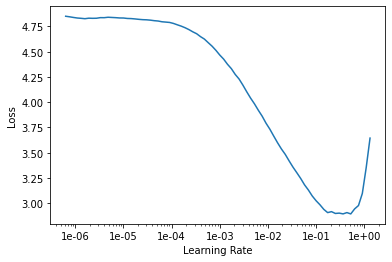

In [79]:
prod_learner = tabular_learner(prod_data, layers=[200,100], metrics=accuracy)
prod_learner.lr_find()
prod_learner.recorder.plot()

In [80]:
prod_learner.fit(9, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,1.311263,0.855024,0.731844,00:02
1,0.794021,0.640938,0.806331,00:02
2,0.454497,1.141686,0.778399,00:02
3,0.272447,1.622986,0.735568,00:02
4,0.168460,1.570721,0.769088,00:02
5,0.100961,2.245554,0.808194,00:02
6,0.062428,1.752803,0.817505,00:02
7,0.034839,1.831684,0.811918,00:02
8,0.022283,1.966702,0.778399,00:02


In [81]:
stage_data = data_block.databunch(stage_df)

/home/jpnelson/ai-env/lib/python3.7/site-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
sinopia:resourceTemplate:bf2:Item:Access, harvard:ignore:RT:bf2:Cartographic:Instance, ld4p:RT:bf2:Playback, ld4p:RT:bf2:NotatedMusic:Item:Un-nested, sinopia:resourceTemplate:bf2:Item:Enumeration...
  if getattr(ds, 'warn', False): warn(ds.warn)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


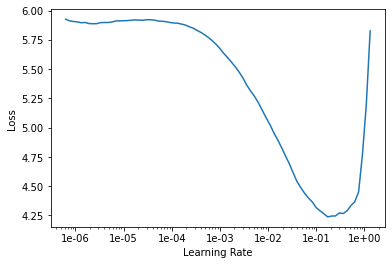

In [82]:
stage_learner = tabular_learner(stage_data, layers=[300,100], metrics=accuracy)
stage_learner.lr_find()
stage_learner.recorder.plot()

In [83]:
stage_learner.fit(9, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,2.062360,1.687049,0.557407,00:04
1,1.379372,1.602566,0.610185,00:04
2,0.958187,1.947584,0.600000,00:04
3,0.749342,8.479072,0.612037,00:04
4,0.592752,45.797874,0.564815,00:04
5,0.498317,44.612015,0.625000,00:04
6,0.446515,50.191547,0.596296,00:04
7,0.408651,39.376598,0.596296,00:04
8,0.377642,65.056435,0.582407,00:04


In [23]:
prod_learner.data.classes

['CornellSinatra45:Instance',
 'CornellSinatra45:Work',
 'PMO:RT:bf2:SoundRecording:Instance',
 'PMO:RT:bf2:SoundRecording:Work',
 'UAL:resourceTemplate:bf2:Monograph:Instance',
 'UAL:resourceTemplate:bf2:Monograph:Instance:Un-Nested',
 'UAL:resourceTemplate:bf2:Monograph:Item:Un-Nested',
 'UAL:resourceTemplate:bf2:Monograph:Opus',
 'UAL:resourceTemplate:bf2:Monograph:Opus:Un-Nested',
 'UAL:resourceTemplate:bf2:Monograph:Work',
 'UAL:resourceTemplate:bf2:Monograph:Work:Un-Nested',
 'UAL:resourceTemplate:bf2:Serial:Instance',
 'UAL:resourceTemplate:bf2:Serial:Item',
 'UAL:resourceTemplate:bf2:Serial:Opus:Un-Nested',
 'UAL:resourceTemplate:bf2:Serial:Work',
 'UCSD:RT:BF2:Monograph:Instance_OpenAccess:Un-nested',
 'UCSD:RT:BF2:Monograph:Item_OpenAccess_UnNested',
 'UCSD:RT:BF2:Monograph:Work:Un-nested',
 'UCSD:RT:BF2:NotatedMusic:Work:Un-nested',
 'UCSD:RT:BF2:NotatedMusicOnline:Instance_OpenAccess:Un-nested',
 'UChicago:RT:bf2:Monograph:Instance',
 'UChicago:RT:bf2:Monograph:Item',
 'UCh

In [24]:
len(prod_data.classes)

109

In [25]:
len(stage_data.classes)

302

## Second Strategy - Actual RDF Predicates as Data Frame Columns

Instead of using all of the possible predicates contained in the resource templates, this version of `to_dataframe` only uses the existing 

In [57]:
def to_dataframe(graphs: List[dict]) -> pd.DataFrame:
    start = datetime.datetime.utcnow()
    print(f"Starting convert {len(graphs)} to dataframe at {start}")
    raw_data = []
    for i,row in enumerate(graphs):
        graph = row['graph']
        if not i%10:
            print(".", end="")
        if not i%100:
            print(f"{i}", end="")
        rt_query = graph.query(data_loader.SUBJ_RT)
        for subj, rt in rt_query:                
            subject = { 'subject': str(subj),
                        'group': row['group'],
                        'resource_template': str(rt) }
            for predicate in graph.predicates(subject=subj):
                pred_str = str(predicate)
                if pred_str in subject:
                    subject[pred_str] += 1
                else:
                    subject[pred_str] = 1
            raw_data.append(subject)
    end = datetime.datetime.utcnow()
    df = pd.DataFrame(data=raw_data).fillna(0).sample(frac=1).reset_index(drop=True)
    print(f"Finished at {end} total time {(end-start).seconds / 60.} minutes for dataframe, size {len(df)}")
    return df

In [58]:
prod2_df = to_dataframe(production)

Starting convert 2725 to dataframe at 2020-06-26 20:03:41.977130
.0..........100..........200..........300..........400..........500..........600..........700..........800..........900..........1000..........1100..........1200..........1300..........1400..........1500..........1600..........1700..........1800..........1900..........2000..........2100..........2200..........2300..........2400..........2500..........2600..........2700..Finished at 2020-06-26 20:04:08.246288 total time 0.43333333333333335 minutes for dataframe, size 2727


In [59]:
prod2_df.head()

,subject,group,resource_template,http://id.loc.gov/ontologies/bibframe/date,http://id.loc.gov/ontologies/bibframe/extent,http://id.loc.gov/ontologies/bibframe/dimensions,http://www.w3.org/ns/prov#wasGeneratedBy,http://sinopia.io/vocabulary/hasResourceTemplate,http://id.loc.gov/ontologies/bibframe/title,http://id.loc.gov/ontologies/bibframe/responsibilityStatement,...,http://rdaregistry.info/Elements/m/P30201,http://rdaregistry.info/Elements/m/P30024,http://rdaregistry.info/Elements/i/P40016,http://rdaregistry.info/Elements/m/P30092,http://rdaregistry.info/Elements/m/P30119,http://rdaregistry.info/Elements/m/P30170,http://id.loc.gov/ontologies/bibframe/Person,http://id.loc.gov/ontologies/bibframe/partName,http://id.loc.gov/ontologies/bibframe/partNumber,http://id.loc.gov/ontologies/bflc/target
0,https://trellis.sinopia.io/repository/nlm/d306...,nlm,ld4p:RT:bf2:Monograph:Work:Un-nested,0.0,0.0,0.0,4.0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,https://trellis.sinopia.io/repository/nlm/77f1...,nlm,ld4p:RT:bf2:Monograph:Work:Un-nested,0.0,0.0,0.0,5.0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,https://trellis.sinopia.io/repository/northwes...,northwestern,ld4p:RT:bf2:Monograph:Work,0.0,0.0,0.0,1.0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,https://trellis.sinopia.io/repository/nlm/a0c6...,nlm,ld4p:RT:bf2:Monograph:Instance:Un-nested,0.0,1.0,0.0,4.0,1,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,https://trellis.sinopia.io/repository/nlm/7728...,nlm,nlm:RT:bf2:AdminMetadata,0.0,0.0,0.0,1.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [60]:
prod2_df.tail()

,subject,group,resource_template,http://id.loc.gov/ontologies/bibframe/date,http://id.loc.gov/ontologies/bibframe/extent,http://id.loc.gov/ontologies/bibframe/dimensions,http://www.w3.org/ns/prov#wasGeneratedBy,http://sinopia.io/vocabulary/hasResourceTemplate,http://id.loc.gov/ontologies/bibframe/title,http://id.loc.gov/ontologies/bibframe/responsibilityStatement,...,http://rdaregistry.info/Elements/m/P30201,http://rdaregistry.info/Elements/m/P30024,http://rdaregistry.info/Elements/i/P40016,http://rdaregistry.info/Elements/m/P30092,http://rdaregistry.info/Elements/m/P30119,http://rdaregistry.info/Elements/m/P30170,http://id.loc.gov/ontologies/bibframe/Person,http://id.loc.gov/ontologies/bibframe/partName,http://id.loc.gov/ontologies/bibframe/partNumber,http://id.loc.gov/ontologies/bflc/target
2722,https://trellis.sinopia.io/repository/washingt...,washington,WAU:RT:RDA:Expression:monograph,0.0,0.0,0.0,2.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2723,https://trellis.sinopia.io/repository/alberta/...,alberta,UAL:resourceTemplate:bf2:Monograph:Opus:Un-Nested,0.0,0.0,0.0,2.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2724,https://trellis.sinopia.io/repository/washingt...,washington,WAU:RT:RDA:Manifestation:monograph,0.0,0.0,0.0,1.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2725,https://trellis.sinopia.io/repository/yale/d9a...,yale,Yale:RT:BF2:Monograph:Instance:CtY,0.0,1.0,0.0,3.0,1,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2726,https://trellis.sinopia.io/repository/northwes...,northwestern,ld4p:RT:bf2:Monograph:Work,0.0,0.0,0.0,1.0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
prod2_data = data_block.databunch(prod2_df)

/home/jpnelson/ai-env/lib/python3.7/site-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
ld4p:RT:bf2:Cartographic:Instance, ld4p:RT:bf2:Cartographic:Work, ld4p:RT:bf2:WorkTitle, WAU:RT:RDA:Item:graphic, WAU:RT:RDA:Manifestation:eGraphic...
  if getattr(ds, 'warn', False): warn(ds.warn)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


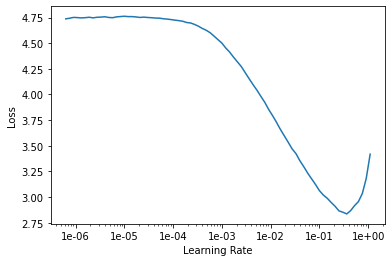

In [62]:
prod2_learner = tabular_learner(prod2_data, layers=[200,100], metrics=accuracy)
prod2_learner.lr_find()
prod2_learner.recorder.plot()

In [63]:
prod2_learner.fit(9, 1e-01)

epoch,train_loss,valid_loss,accuracy,time
0,1.753750,0.947550,0.729831,00:02
1,1.035770,0.879092,0.767355,00:02
2,0.700652,1.552095,0.778612,00:01
3,0.539662,2.247488,0.696060,00:02
4,0.448174,1.978686,0.778612,00:02
5,0.461771,2.694495,0.729831,00:02
6,0.435228,2.644563,0.776735,00:02
7,0.374010,2.800393,0.748593,00:02
8,0.305978,3.211105,0.737336,00:02


In [64]:
stage2_df = to_dataframe(stage)

Starting convert 4067 to dataframe at 2020-06-26 20:05:32.833699
.0..........100..........200..........300..........400..........500..........600..........700..........800..........900..........1000..........1100..........1200..........1300..........1400..........1500..........1600..........1700..........1800..........1900..........2000..........2100..........2200..........2300..........2400..........2500..........2600..........2700..........2800..........2900..........3000..........3100..........3200..........3300..........3400..........3500..........3600..........3700..........3800..........3900..........4000......Finished at 2020-06-26 20:06:12.081354 total time 0.65 minutes for dataframe, size 5497


In [65]:
stage2_df.head()

,subject,group,resource_template,http://id.loc.gov/ontologies/bibframe/language,http://sinopia.io/vocabulary/hasResourceTemplate,http://id.loc.gov/ontologies/bibframe/contribution,http://id.loc.gov/ontologies/bibframe/title,http://www.w3.org/ns/prov#wasGeneratedBy,http://id.loc.gov/ontologies/bibframe/content,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,...,http://id.loc.gov/ontologies/bibframe/derivedFrom,http://rdaregistry.info/Elements/w/P10223,http://rdaregistry.info/Elements/w/P10256,http://rdaregistry.info/Elements/e/P20310,http://id.loc.gov/ontologies/bibframe/hasContribution,http://rdaregistry.info/Elements/u/P60159,http://www.ontologydesignpatterns.org/cp/owl/sequence.owl#precedes,http://id.loc.gov/ontologies/bflc/indexedIn,https://w3id.org/arm/core/ontology/0.1/hasSource,http://id.loc.gov/ontologies/bflc/projectedProvisionDate
0,https://trellis.stage.sinopia.io/repository/fr...,frick,Frick:RT:bf2:AuctionCatalog:Work,1.0,1,1.0,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,https://trellis.stage.sinopia.io/repository/co...,cornell,ld4p:RT:bf2:Title:AbbrTitle,0.0,1,0.0,0.0,1.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,https://trellis.stage.sinopia.io/repository/mi...,minnesota,ld4p:RT:bf2:Cartographic:Work,1.0,1,1.0,1.0,10.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,https://trellis.stage.sinopia.io/repository/ta...,tamu,TAMU:RT:BF2:Monograph:Instance,0.0,1,0.0,1.0,1.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,https://trellis.stage.sinopia.io/repository/uc...,ucsd,UCSD:RT:BF2:Monograph:Instance_OpenAccess:Un-n...,0.0,1,0.0,1.0,3.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
stage2_df.tail()

,subject,group,resource_template,http://id.loc.gov/ontologies/bibframe/language,http://sinopia.io/vocabulary/hasResourceTemplate,http://id.loc.gov/ontologies/bibframe/contribution,http://id.loc.gov/ontologies/bibframe/title,http://www.w3.org/ns/prov#wasGeneratedBy,http://id.loc.gov/ontologies/bibframe/content,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,...,http://id.loc.gov/ontologies/bibframe/derivedFrom,http://rdaregistry.info/Elements/w/P10223,http://rdaregistry.info/Elements/w/P10256,http://rdaregistry.info/Elements/e/P20310,http://id.loc.gov/ontologies/bibframe/hasContribution,http://rdaregistry.info/Elements/u/P60159,http://www.ontologydesignpatterns.org/cp/owl/sequence.owl#precedes,http://id.loc.gov/ontologies/bflc/indexedIn,https://w3id.org/arm/core/ontology/0.1/hasSource,http://id.loc.gov/ontologies/bflc/projectedProvisionDate
5492,https://trellis.stage.sinopia.io/repository/uc...,ucsd,UCSD:RT:bf2:Monograph:Item_UnNested,0.0,1,0.0,1.0,2.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5493,https://trellis.stage.sinopia.io/repository/ta...,tamu,TAMU:RT:BF2:Monograph:Instance:Un-nested,0.0,1,0.0,1.0,3.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5494,https://trellis.stage.sinopia.io/repository/ya...,yale,Yale:RT:BF2:AdminMetadata:CtY,0.0,1,0.0,0.0,1.0,0.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5495,https://trellis.stage.sinopia.io/repository/ta...,tamu,TAMU:RT:BF2:Monograph:Instance,0.0,1,0.0,1.0,1.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5496,b5,princeton,stanford:RT:BF2:Monograph:Item,0.0,1,0.0,0.0,0.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
stage2_data = data_block.databunch(stage2_df)

/home/jpnelson/ai-env/lib/python3.7/site-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
stanford:RT:BF2:IEEEProceedings(L3):Work:Un-nested, sinopia:resourceTemplate:bf2:Item:Enumeration, sinopia:resourceTemplate:schema:Book, harvard:test2:resourceTemplate:bf2:TopicSearch, ld4p:RT:bf2:RelatedWork...
  if getattr(ds, 'warn', False): warn(ds.warn)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


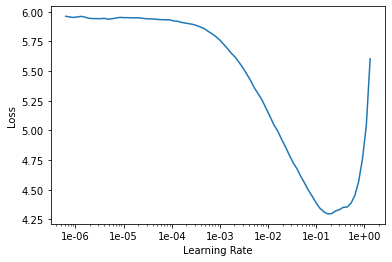

In [68]:
stage2_learner = tabular_learner(stage2_data, layers=[300,100], metrics=accuracy)
stage2_learner.lr_find()
stage2_learner.recorder.plot()

In [69]:
stage2_learner.fit(9, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,2.021183,1.396749,0.619797,00:03
1,1.369365,1.821088,0.643848,00:03
2,0.914967,1.562657,0.652174,00:03
3,0.686067,1.778111,0.651249,00:03
4,0.567388,1.639665,0.663275,00:03
5,0.474714,1.634118,0.667900,00:03
6,0.423930,1.665358,0.670675,00:03
7,0.396062,1.727719,0.679001,00:03
8,0.380531,1.727658,0.664200,00:03


## Third Strategy - RDF Triples with Subject-Predicate-Object columns

In [103]:
def graph_triples_df(graph: rdflib.Graph, group: str) -> pd.DataFrame:
    data = [(str(s), str(p), str(o)) for s,p,o in graph.skolemize(authority=f"https://{graph.identifier}.sinopia.io//")]
    result = graph.query(data_loader.SUBJ_RT)
    if len(result.bindings) < 1:
        return # Doesn't try to return anything
    resource_template = str(graph.query(data_loader.SUBJ_RT).bindings[0]['resource_template'])
    df = pd.DataFrame(data=data, columns=['Subject', 'Predicate', 'Object'])
    df['resource_template'] = resource_template
    df['group'] = group
    return df

def all_triples(graphs: List[dict]):
    start = datetime.datetime.utcnow()
    print(f"Started at {start}")
    all_dataframes = []
    for i,row in enumerate(graphs):
        if not i % 10:
            print(".", end="")
        if not i % 100:
            print(f"{i}", end="")
        all_dataframes.append(graph_triples_df(row['graph'], row['group']))
    uber_df = pd.concat(all_dataframes)
    # Randomize triples in the master data frame
    uber_df.sample(frac=1).reset_index(drop=True)
    end = datetime.datetime.utcnow()
    print(f"{end} total size {len(uber_df)} in {(end-start).seconds / 60.}")
    return uber_df
        
        

In [90]:
prod2_triples_df = all_triples(production)

2020-06-26 20:25:09.135393
2020-06-26 20:26:27.594096 total size 146638


In [93]:
prod2_triples_df

,Subject,Predicate,Object,resource_template,group
0,https://Ne0bc8829e35648d4aac620d487a4c400.sino...,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,https://www.w3.org/ns/activitystreams#Update,ld4p:RT:bf2:Monograph:Instance,ucdavis
1,https://Ne0bc8829e35648d4aac620d487a4c400.sino...,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://id.loc.gov/ontologies/bibframe/Work,ld4p:RT:bf2:Monograph:Instance,ucdavis
2,https://trellis.sinopia.io/repository/ucdavis/...,http://id.loc.gov/ontologies/bibframe/title,https://Ne0bc8829e35648d4aac620d487a4c400.sino...,ld4p:RT:bf2:Monograph:Instance,ucdavis
3,https://trellis.sinopia.io/repository/ucdavis/...,http://sinopia.io/vocabulary/hasResourceTemplate,ld4p:RT:bf2:Monograph:Instance,ld4p:RT:bf2:Monograph:Instance,ucdavis
4,https://Ne0bc8829e35648d4aac620d487a4c400.sino...,http://id.loc.gov/ontologies/bibframe/mainTitle,万历东征,ld4p:RT:bf2:Monograph:Instance,ucdavis
...,...,...,...,...,...
14,http://id.loc.gov/vocabulary/menclvl/f,http://www.w3.org/2000/01/rdf-schema#label,full,nlm:RT:bf2:AdminMetadata,nlm
15,http://id.loc.gov/vocabulary/descriptionConven...,http://www.w3.org/2000/01/rdf-schema#label,RDA,nlm:RT:bf2:AdminMetadata,nlm
16,https://Ndcb46971a90045b8853ba90dd8764ebb.sino...,http://www.w3.org/ns/prov#atTime,2020-06-10T19:23:43.006000+00:00,nlm:RT:bf2:AdminMetadata,nlm
17,http://id.loc.gov/vocabulary/languages/eng,http://www.w3.org/2000/01/rdf-schema#label,English,nlm:RT:bf2:AdminMetadata,nlm


In [92]:
prod2_triples_df.tail()

,Subject,Predicate,Object,resource_template,group
14,http://id.loc.gov/vocabulary/menclvl/f,http://www.w3.org/2000/01/rdf-schema#label,full,nlm:RT:bf2:AdminMetadata,nlm
15,http://id.loc.gov/vocabulary/descriptionConven...,http://www.w3.org/2000/01/rdf-schema#label,RDA,nlm:RT:bf2:AdminMetadata,nlm
16,https://Ndcb46971a90045b8853ba90dd8764ebb.sino...,http://www.w3.org/ns/prov#atTime,2020-06-10T19:23:43.006000+00:00,nlm:RT:bf2:AdminMetadata,nlm
17,http://id.loc.gov/vocabulary/languages/eng,http://www.w3.org/2000/01/rdf-schema#label,English,nlm:RT:bf2:AdminMetadata,nlm
18,https://trellis.sinopia.io/repository/nlm/791b...,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://id.loc.gov/ontologies/bibframe/AdminMet...,nlm:RT:bf2:AdminMetadata,nlm


In [99]:
from fastai.tabular import Categorify, DataBunch, TabularList # type: ignore

def triples_databunch(df: pd.DataFrame) -> DataBunch:
    category_names = ['Subject', 'Predicate', 'group']
    procedures = [Categorify]
    # Reserve last 20% of Data Frame for validation
    total = len(df)
    last_start = total - int(total*.2)
    test = TabularList.from_df(df[last_start:total].copy(),
                               cat_names=category_names)
    return (TabularList.from_df(df,
                                cat_names=category_names,
                                procs=procedures)
                       .split_by_idx(list(range(last_start, total)))
                       .label_from_df(cols='resource_template')
                       .add_test(test)
                       .databunch())

In [100]:
prod2_triples_data = triples_databunch(prod2_triples_df)

/home/jpnelson/ai-env/lib/python3.7/site-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
ld4p:RT:bf2:AdminMetadata, sinopia:resourceTemplate:bf2:Agent:bfPerson, ld4p:RT:bf2:WorkTitle, nlm:RT:bf2:AdminMetadata
  if getattr(ds, 'warn', False): warn(ds.warn)


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


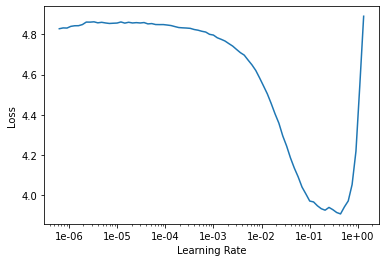

In [107]:
prod2_triples_learner = tabular_learner(prod2_triples_data, layers=[200,100], metrics=accuracy)
prod2_triples_learner.lr_find()
prod2_triples_learner.recorder.plot()

In [109]:
prod2_triples_learner.fit(3, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.303253,2.749107,0.336682,05:48
1,0.270115,3.754190,0.150416,05:51
2,0.244449,3.814091,0.296025,05:44


In [104]:
stage2_triples_df = all_triples(stage)

Started at 2020-06-26 20:45:12.005241
.0..........100..........200..........300..........400..........500..........600..........700..........800..........900..........1000..........1100..........1200..........1300..........1400..........1500..........1600..........1700..........1800..........1900..........2000..........2100..........2200..........2300..........2400..........2500..........2600..........2700..........2800..........2900..........3000..........3100..........3200..........3300..........3400..........3500..........3600..........3700..........3800..........3900..........4000......2020-06-26 20:47:17.606290 total size 254586 in 2.0833333333333335


In [106]:
stage2_triples_data = triples_databunch(stage2_triples_df)

/home/jpnelson/ai-env/lib/python3.7/site-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
WAU:RT:RDA:Expression:monograph, ld4p:RT:bf2:NotatedMusic:Work, sinopia:resourceTemplate:schema:Book, WAU:RT:RDA:Expression:etd, test:rt:wikidata...
  if getattr(ds, 'warn', False): warn(ds.warn)


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


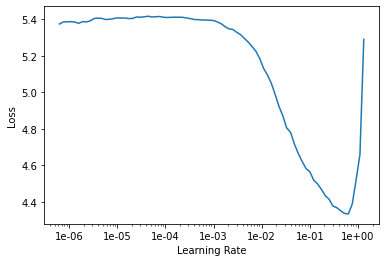

In [110]:
stage2_triples_learner = tabular_learner(stage2_triples_data, layers=[200,100], metrics=accuracy)
stage2_triples_learner.lr_find()
stage2_triples_learner.recorder.plot()

In [111]:
stage2_triples_learner.fit(3, 1e-01)

epoch,train_loss,valid_loss,accuracy,time
0,0.976790,2.973397,0.393081,18:57
1,1.016547,4.214326,0.426505,25:56
2,0.927489,3.584441,0.435812,25:53
